In [84]:
# Importando bibliotecas

import os
import glob
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image   

In [85]:
# Definindo diretório

#os.chdir(r"D:\Documents\Scripts\TCC\Hits\Dataset\Bases Usadas No Modelo")
os.chdir(r"D:\Documents\Scripts\TCC\Hits\Dataset\Bases Tratadas\Spotify")

In [86]:
# Loop para pegar todos os nomes dos CSV

extensao = 'csv'
arquivos = [i for i in glob.glob('*.{}'.format(extensao))]

arquivos

['FINAL_dataset-of-00s.csv',
 'FINAL_dataset-of-10s.csv',
 'FINAL_dataset-of-60s.csv',
 'FINAL_dataset-of-70s.csv',
 'FINAL_dataset-of-80s.csv',
 'FINAL_dataset-of-90s.csv']

In [87]:
# Juntando os arquivos em um só 

data = pd.concat([pd.read_csv(f) for f in arquivos ])
data.reset_index(drop=True, inplace=True)

In [88]:
# Verificando como ficou o dataset unificado

from Exploração_inicial import Descreve_Dataset, Dataset_Colunas_Nulos, Amostra_Dataset

analise_df = data
Descreve_Dataset(analise_df)
Dataset_Colunas_Nulos(analise_df)
Amostra_Dataset(analise_df)


O dataset apresenta 23 variáveis (colunas) e 33056 registros.

A seguir a listagem das colunas, seus tipos e seu nível de preenchimento:



Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'artist_name', 'artist_final', 'country',
       'genre'],
      dtype='object')

,Tipo,Nulos,Nulos (%)
track,object,0,0.0
artist,object,0,0.0
uri,object,0,0.0
danceability,float64,0,0.0
energy,float64,0,0.0
key,int64,0,0.0
loudness,float64,0,0.0
mode,int64,0,0.0
speechiness,float64,0,0.0
acousticness,float64,0,0.0


Amostra para verificar o formato de preenchimento das colunas:



,0,1,2,3,4
track,Lucky Man,Clouds Of Dementia,I Got A Feelin',Divorced,Where I Come From
artist,Montgomery Gentry,Candlemass,Billy Currington,Blacklisted,Alan Jackson
uri,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,spotify:track:1tF370eYXUcWwkIvaq3IGz,spotify:track:0iAdSLiQBIizTAiLUP7p5E,spotify:track:6ej1QJ8eIYmhsyTlvgDajy
danceability,0.578,0.162,0.63,0.365,0.726
energy,0.471,0.836,0.764,0.922,0.631
key,4,9,2,1,11
loudness,-7.27,-3.009,-4.353,-2.644,-8.136
mode,1,1,1,1,0
speechiness,0.0289,0.0473,0.0275,0.071,0.0334
acousticness,0.368,0.000111,0.363,0.00285,0.22


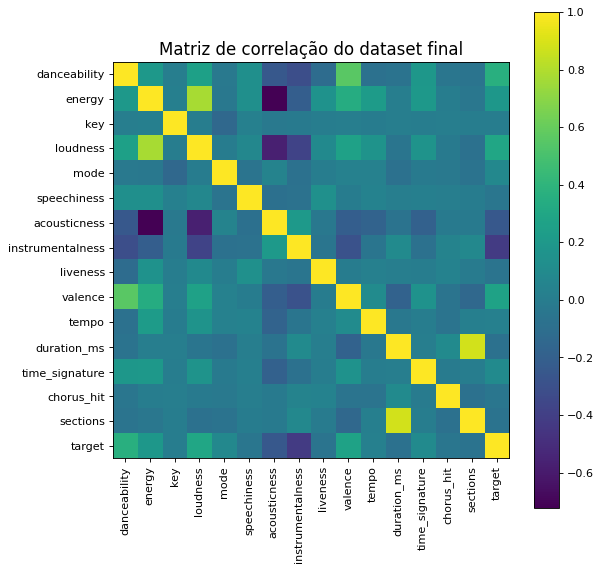

In [89]:
# Matriz de correlação

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Matriz de correlação do {filename}', fontsize=15)
    plt.show()

df1 = data
df1.dataframeName = 'dataset final'
nRow, nCol = df1.shape
    
    
plotCorrelationMatrix(df1, 8)

In [139]:
# Mostra por país Billboard

df_group_country = data.groupby('country')['target'].sum().reset_index()
df_group_country=df_group_country.sort_values(by='target', ascending=False)

<AxesSubplot:title={'center':'Países com mais músicas no dataset'}>

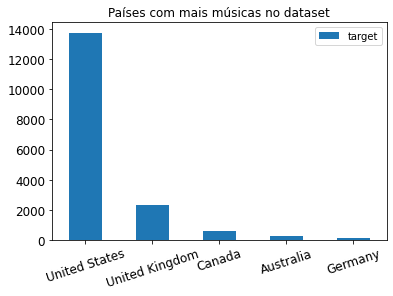

In [140]:
country_top5= df_group_country.head(5)

country_top5.plot(x="country", y="target", kind="bar",title='Países com mais músicas no dataset',rot=18,
             ylabel='',xlabel = '', fontsize=12
             #,color=['#4a4978','#4963a2','#ff3737','#800046','#6db221']
             )

<AxesSubplot:title={'center':'10s'}, ylabel='Qtd músicas'>

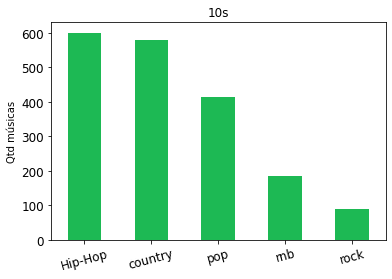

In [146]:
# ANOS 60

os.chdir(r"D:\Documents\Scripts\TCC\Hits\Dataset\Bases Tratadas\Spotify")

data60 = pd.read_csv('FINAL_dataset-of-10s.csv')

genre_total = data60.groupby("genre")["target"].sum().sort_values(ascending=False)

genre_top5= genre_total.head(5)

genre_top5.plot(x="genre", y="target", kind="bar",title='10s',
                ylabel='Qtd músicas', xlabel = '',rot=15,fontsize=12, color = '#1DB954')

In [92]:
genre_total = data.groupby("genre")["target"].sum().sort_values(ascending=False)

genre_total

genre
soul            2177
country         1991
pop             1761
classic rock    1510
Hip-Hop         1164
                ... 
cumbia             0
cuban              0
cuba               0
crunkcore          0
zydeco             0
Name: target, Length: 578, dtype: int64

<AxesSubplot:ylabel='Qtd músicas'>

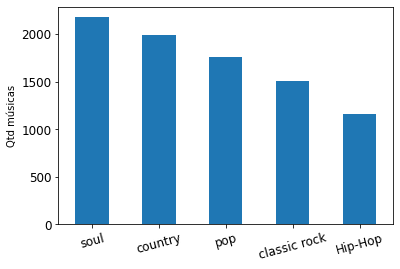

In [111]:
genre_top5= genre_total.head(5)

genre_top5.plot(x="genre", y="target", kind="bar",title='',
                ylabel='Qtd músicas', xlabel = '',rot=15,fontsize=12)

In [99]:
artists_top5 = data.groupby("artist_name")["target"].sum().sort_values(ascending=False)

artists_top5 = artists_top5.head(5)

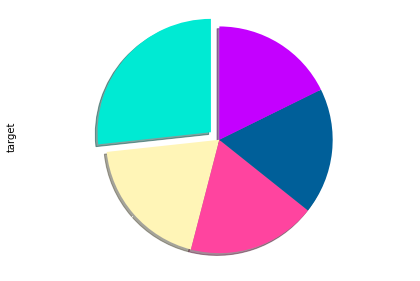

In [100]:
# Gráfico de Pizza

explode = (0.1, 0, 0, 0, 0)
colors = ['#00EAD3','#FFF5B7','#FF449F','#005F99', '#C400FF']

artists_top5.plot.pie(y='target', shadow=True, startangle=90, autopct='%1.0f%%', 
                      pctdistance=1.1, labeldistance=1.2, colors=colors, 
                      textprops={'color':"w"},
                      explode=explode)
plt.axis('equal')
plt.tight_layout()
plt.show()                      

In [109]:
# Criando um dataframe apenas com registros HIT

data_hit = data

data_hit = data_hit[(data_hit['target']==True)]

data_hit
                    

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,duration_ms,time_signature,chorus_hit,sections,target,artist_name,artist_final,country,genre
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.36800,...,133.061,196707,4,30.88059,13,1,Montgomery Gentry,Montgomery Gentry,United States,country
2,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.36300,...,112.098,193760,4,22.62384,10,1,Billy Currington,Billy Currington,United States,country
4,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.22000,...,124.711,239240,4,35.59732,10,1,Alan Jackson,Alan Jackson,United States,country
5,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.05380,...,153.105,253640,4,19.65701,11,1,Tim McGraw,Tim McGraw,United States,country
7,F.U.R.B. (F U Right Back),Frankee,spotify:track:7jElrCgQJBcVLsbMRKni2t,0.787,0.632,8,-3.487,1,0.1370,0.10300,...,141.026,198173,4,18.09100,9,1,Frankee,Frankee,United States,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33049,Love Like This,Faith Evans,spotify:track:7MQywXGHEev7JmwwIzMcao,0.767,0.551,0,-7.328,1,0.0616,0.00364,...,100.904,275707,4,32.35991,11,1,Faith Evans,Faith Evans,United States,rnb
33050,"No Guns, No Murder",Rayvon,spotify:track:54zbUGqw8JRk020wLRWlHl,0.797,0.683,10,-14.299,0,0.2190,0.08160,...,97.984,277027,4,28.96569,15,1,Rayvon,Rayvon,United States,reggae
33051,Deeper,Boss,spotify:track:6PZ4laM20qkvIrgji3NLsK,0.631,0.848,6,-6.435,0,0.3380,0.05500,...,83.155,241560,4,22.23523,13,1,Boss,Boss,United States,rap
33053,Good Times,Edie Brickell,spotify:track:6UPfnVoOq3y3BvapBIKs8J,0.562,0.314,10,-15.213,0,0.0298,0.44000,...,166.847,189827,4,21.11763,10,1,Edie Brickell,Edie Brickell,United States,female vocalists


<ipython-input-110-dc29c87eaa60>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columnName] = df[columnName].astype('str')


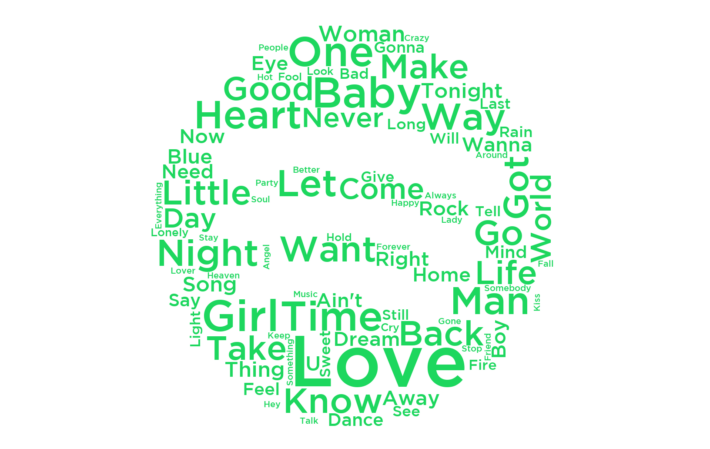

In [110]:
# Nuvem de Palavras

os.chdir(r"D:\Documents\Scripts\TCC\Hits\Imagens")

music_mask = np.array(Image.open("music.jpg"))

font_path = (r"D:\Documents\Scripts\TCC\Hits\Imagens\GothamMedium.ttf")

def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    h = 141 # 0 - 360
    s = 76 # 0 - 100
    l = 48 # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)
 
# Create the wordcloud object
#title_wordcloud = WordCloud(mask=music_mask).generate(corpus)

def wordCloud_coluna(df, columnName):
    df[columnName] = df[columnName].astype('str')
    corpus = ' '.join(df[columnName])
    title_wordcloud = WordCloud(mask=music_mask, font_path=font_path,
                                stopwords=STOPWORDS, max_words = 90,
                                background_color='white', height=2000, random_state=42,
                                width=4000, color_func=one_color_func).generate(corpus)
    plt.figure(figsize=(16,8))
    plt.imshow(title_wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

wordCloud_coluna(data_hit, 'track')